In [1]:
from sympy import *

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib as mpl

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [137]:
mpl.use("pgf")
#plt.rcParams['text.latex.unicode'] = True
plt.rcParams.update({
    "pgf.texsystem":   "pdflatex", # or any other engine you want to use
    "text.usetex":     True,       # use TeX for all texts
    "font.family":     "serif",
    "font.serif":      [],         # empty entries should cause the usage of the document fonts
    "font.sans-serif": [],
    "font.monospace":  [],
    "font.size":       10,         # control font sizes of different elements
    "axes.labelsize":  10,
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "pgf.preamble": [              # specify additional preamble calls for LaTeX's run
        r"\usepackage[T1]{fontenc}",
        r"\usepackage{siunitx}",
        r"\usepackage[utf8]{inputenc}",
        r"\DeclareUnicodeCharacter{2212}{-}",
    ],
})

/home/maxkway/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [6]:
init_printing()

In [9]:
def get_c_k(k):
    n_k = 2*k + 1
    return 4*(-l**2/(pi*n_k)/(l**2 + (pi*n_k)**2))#/(I*w)

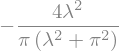

In [45]:
get_c_k(0)

In [10]:
def get_f_k(k):
    n_k = 2*k + 1
    l_y = 1/b * sqrt((pi*n_k)**2 - I*w)
    f_k = -sin(n_k*pi*(x-Rational(1,2))) *  get_c_k(k) *(exp(l_y*(y-Rational(1,2))) + exp(-l_y*(y+Rational(1,2))))/(1 + exp(-l_y))#* cosh(l_y*y) / cosh(l_y/2) 
    return f_k

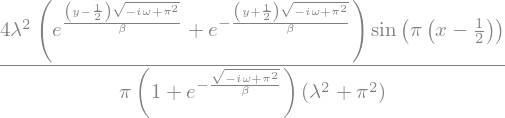

In [19]:
get_f_k(0)

In [11]:
l = symbols('lambda')

In [12]:
x, y, b, w = symbols('x y beta omega', real='True')

In [13]:
#f_p = (1 - cosh(l*x)/cosh(l/2))#/(I*w)
f_p = (1 - (exp(l*(x-Rational(1,2))) + exp(-l*(x+Rational(1,2))))/(1+exp(-l)))#/(I*w)

<IPython.core.display.Javascript object>


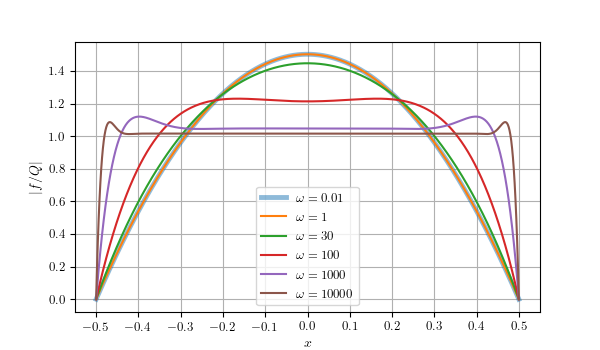

In [99]:
%matplotlib notebook
X = np.linspace(-1/2,1/2, 500)

u = f_p.subs(l, sqrt(-I*w))/(I*w)


plt.figure(figsize=(6,3.5))

plt.xlabel(r'$x$')
plt.ylabel(r'$|f/Q|$')
#plt.title('Plane case')
##
W=0.01
u_new = u.subs({w:W})
u_lam = lambdify([x], u_new)
U = u_lam(X)
plt.plot(X, np.abs(U/np.sum(U)*len(U)), label=fr'$\omega={W}$', lw=3.5, alpha=0.5)


for W in [1, 30, 100, 1000, 10000]:
    u_new = u.subs({w:W})
    u_lam = lambdify([x], u_new)
    U = u_lam(X)
    plt.plot(X, np.abs(U/np.sum(U)*len(U)), label=fr'$\omega={W}$')
#plt.xlim(-np.sqrt(Xi_0**2+1)*1.1, np.sqrt(Xi_0**2+1)*1.1)
#plt.axis('scaled')

plt.legend()
plt.grid()
#plt.ylim(-Xi_0*2, Xi_0*2)
plt.xticks([-0.5,-0.4, -0.3, -0.2, -0.1, 0, 0.1,0.2,0.3,0.4,0.5])

file_name = f'Abs plane'
plt.savefig(file_name +'.pgf')
plt.savefig(file_name +'.pdf')


<IPython.core.display.Javascript object>


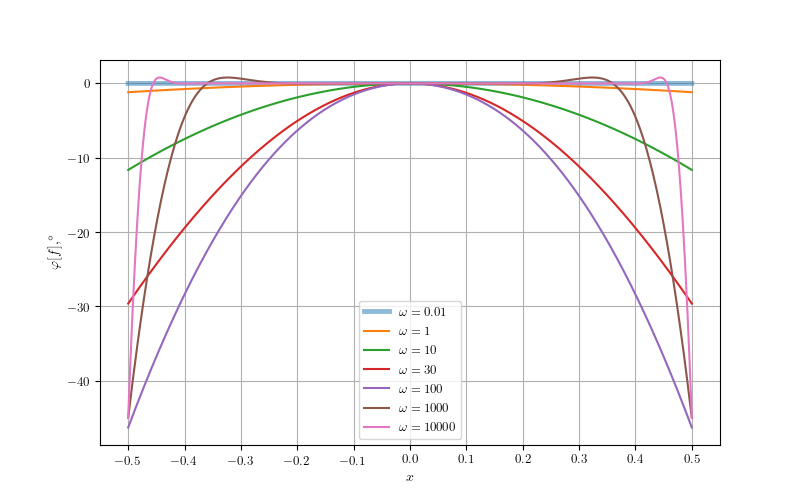

In [17]:
%matplotlib notebook
X = np.linspace(-1/2+1e-8,1/2-1e-8, 500)

u = f_p.subs(l, sqrt(-I*w))/(I*w)


plt.figure(figsize=(8,5))

plt.xlabel(r'$x$')
plt.ylabel(r'$\varphi[f], ^\circ$')
#plt.title(r'$\beta=0$')
##
W=0.01
u_new = u.subs({w:W})
u_lam = lambdify([x], u_new)
U = u_lam(X)
plt.plot(X, np.angle(U/u_lam(0), deg=True), label=fr'$\omega={W}$', lw=3.5, alpha=0.5)


for W in [1, 10, 30, 100, 1000, 10000]:
    u_new = u.subs({w:W})
    u_lam = lambdify([x], u_new)
    U = u_lam(X)
    plt.plot(X, np.angle(U/u_lam(0), deg=True), label=fr'$\omega={W}$')
#plt.xlim(-np.sqrt(Xi_0**2+1)*1.1, np.sqrt(Xi_0**2+1)*1.1)
#plt.axis('scaled')

plt.legend()
plt.grid()
#plt.ylim(-Xi_0*2, Xi_0*2)
plt.xticks([-0.5,-0.4, -0.3, -0.2, -0.1, 0, 0.1,0.2,0.3,0.4,0.5])

file_name = f'Phase plane'
plt.savefig(file_name +'.pgf')
plt.savefig(file_name +'.pdf')



<IPython.core.display.Javascript object>


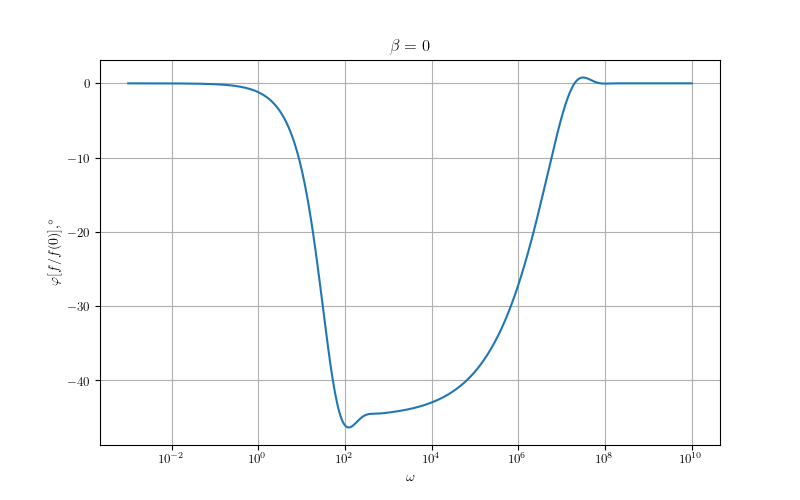

In [35]:
%matplotlib notebook
W = np.logspace(-3, 10, 500)

u = f_p.subs(l, sqrt(-I*w))/(I*w)


plt.figure(figsize=(8,5))

plt.xlabel(r'$\omega$')
plt.ylabel(r'$\varphi[f/f(0)], ^\circ$')
#plt.title(r'$\beta=0$')
##

f_new = u.subs(x, Rational(1,2) - Rational(1,1000))
f_lam = lambdify(w, f_new)
F = f_lam(W)

f_new_0 = u.subs(x, 0)
f_lam_0 = lambdify(w, f_new_0)
F_0 = f_lam_0(W)

plt.plot(W, np.angle(F/F_0, deg=True), label=fr'$\omega={W}$')



plt.legend()
plt.grid()
plt.xscale('log')
#plt.ylim(-Xi_0*2, Xi_0*2)
#plt.xticks([-0.5,-0.4, -0.3, -0.2, -0.1, 0, 0.1,0.2,0.3,0.4,0.5])

#file_name = f'Phase Beta={Beta}'
#plt.savefig(file_name +'.pgf')
#plt.savefig(file_name +'.pdf')



<IPython.core.display.Javascript object>


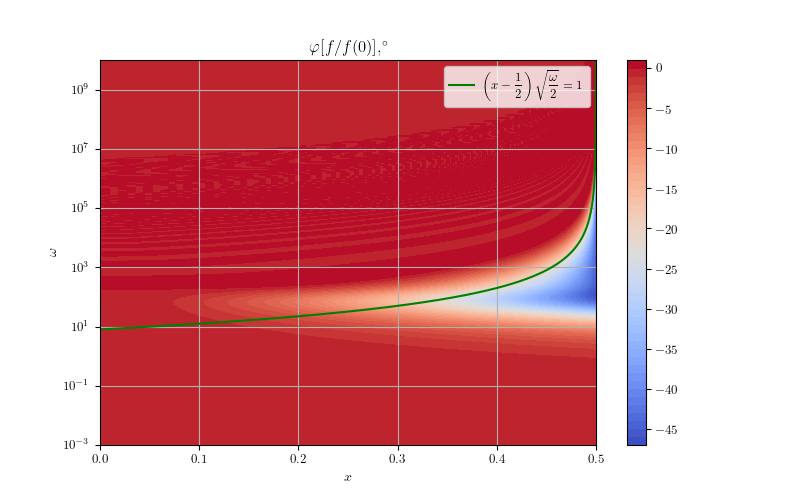

In [66]:
%matplotlib notebook
W = np.logspace(-3, 10, 500)
X = 1/2 -  1/2 * np.logspace(-8, 0, 1000)
X, W = np.meshgrid(X, W)

u = f_p.subs(l, sqrt(-I*w))/(I*w)


plt.figure(figsize=(8,5))
plt.title(r'$\varphi[f/f(0)], ^\circ$')
plt.ylabel(r'$\omega$')
plt.xlabel(r'$x$')
##


u_lam = lambdify([x,w], u)
F = u_lam(X, W)
F_0 = u_lam(0, W)



plt.contourf(X, W, np.angle(F/F_0, deg=True), 50, cmap='coolwarm')
plt.colorbar()


#plt.legend()
plt.grid()
#plt.xscale('log')
plt.yscale('log')

X = 1/2 -  1/2 * np.logspace(-8, -0.001, 1000)
plt.plot(X, 2/(1/2-X)**2, color='green', label=r'$\displaystyle \left(x-\frac{1}{2}\right)\sqrt{\frac{\omega}{2}}=1$')
plt.ylim(W[0,0], W[-1,-1])
plt.xticks([0, 0.1,0.2,0.3,0.4,0.5])
plt.legend()
#plt.ylim(-Xi_0*2, Xi_0*2)
#plt.xticks([-0.5,-0.4, -0.3, -0.2, -0.1, 0, 0.1,0.2,0.3,0.4,0.5])

file_name = f'Phase pic plane'
plt.savefig(file_name +'.pgf')
plt.savefig(file_name +'.pdf')



<IPython.core.display.Javascript object>


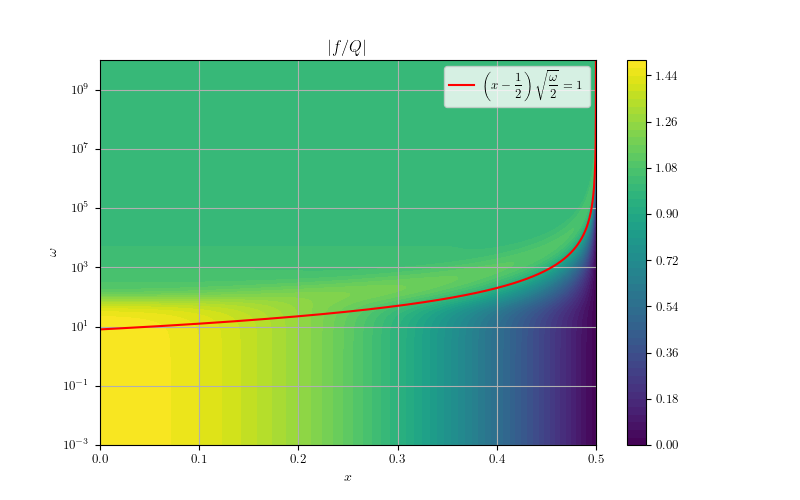

In [63]:
%matplotlib notebook
W = np.logspace(-3, 10, 500)
X = 1/2 -  1/2 * np.logspace(-8, 0, 1000)
X, W = np.meshgrid(X, W)

u = (f_p/(1-tanh(l/2)/(l/2))).subs(l, sqrt(-I*w))


plt.figure(figsize=(8,5))
plt.title(r'$|f/Q|$')

plt.ylabel(r'$\omega$')
plt.xlabel(r'$x$')
##


u_lam = lambdify([x,w], u)
F = u_lam(X, W)



plt.contourf(X, W, np.abs(F), 50)
plt.colorbar()


#plt.legend()
plt.grid()
#plt.xscale('log')
plt.yscale('log')
X = 1/2 -  1/2 * np.logspace(-8, -0.001, 1000)
plt.plot(X, 2/(1/2-X)**2, color='red', label=r'$\displaystyle \left(x-\frac{1}{2}\right)\sqrt{\frac{\omega}{2}}=1$')
plt.ylim(W[0,0], W[-1,-1])
plt.xticks([0, 0.1,0.2,0.3,0.4,0.5])
plt.legend()
file_name = f'Abs pic plane'
plt.savefig(file_name +'.pgf')
plt.savefig(file_name +'.pdf')



In [191]:
def get_q_K_max(K_max):
    q = (1-tanh(l/2)/(l/2))
    for k in range(K_max):
        n_k = 2*k + 1
        l_y = 1/b * sqrt((pi*n_k)**2 - I*w)
        q += get_c_k(k) * (2/(pi*n_k)) * tanh(l_y/2)/(l_y/2) 
    return q

In [192]:
W = np.logspace(-3, 5, 500)
Beta = np.logspace(-8, 0, 500)
W, Beta = np.meshgrid(W, Beta)
K_max = 30
q = get_q_K_max(K_max)
q_new = q.subs(l, sqrt(-I*w))/(I*w)
q_lam = lambdify([b,w], q_new)

In [193]:
Q = q_lam(Beta, W)

In [194]:
q_lam(1e-8,1e-8)

(-0.08333334670147148+2.220446049250313e-08j)

In [195]:
q_lam(0.2, 0.1)

(-0.07282276959891001-0.0006742720953711867j)

In [196]:
np.mean(U)

(-0.07537721205805935-0.0006984345954895601j)

<IPython.core.display.Javascript object>


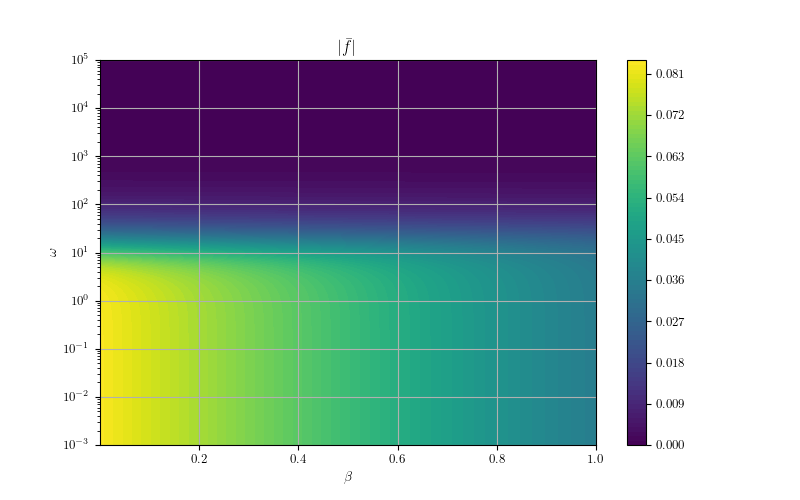

In [197]:
%matplotlib notebook



plt.figure(figsize=(8,5))
plt.title(r'$|\bar{f}|$')

plt.ylabel(r'$\omega$')
plt.xlabel(r'$\beta$')
##





plt.contourf(Beta, W, np.abs(Q), 100)
plt.colorbar()


#plt.legend()
plt.grid()
#plt.xscale('log')
plt.yscale('log')
file_name = f'Abs pic conduct'
plt.savefig(file_name +'.pgf')
plt.savefig(file_name +'.pdf')



<IPython.core.display.Javascript object>


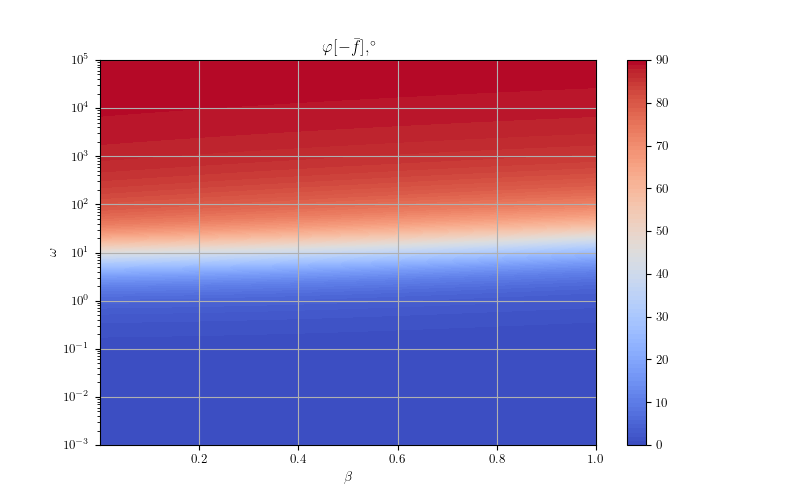

In [198]:
%matplotlib notebook



plt.figure(figsize=(8,5))
plt.title(r'$\varphi[-\bar{f}], ^\circ$')

plt.ylabel(r'$\omega$')
plt.xlabel(r'$\beta$')
##





plt.contourf(Beta, W, np.angle(-Q, deg=True), 100, cmap='coolwarm')
plt.colorbar()


#plt.legend()
plt.grid()
#plt.xscale('log')
plt.yscale('log')
file_name = f'Phase pic conduct'
plt.savefig(file_name +'.pgf')
plt.savefig(file_name +'.pdf')



In [14]:
def get_F_K_max(K_max):
    F = f_p
    for k in range(K_max):
        F += get_f_k(k)
    return F

In [183]:
X = np.linspace(-1/2+1e-2,1/2-1e-2, 500)
Y = np.linspace(-1/2+1e-2,1/2-1e-2, 500)

X,Y = np.meshgrid(X,Y)

K_max = 100 

u = get_F_K_max(K_max)
#u = get_f_k(0)
u = u.subs(l, sqrt(-I*w))/(I*w)

In [184]:
W=0.1
Beta=0.2
u_new = u.subs({w:W, b:Beta})

In [185]:
u_lam = lambdify([x,y], u_new)

In [186]:
u_lam(0.25, 0.25)

(-0.09194358543032964-0.0008736381962060058j)

In [187]:
U = u_lam(Y,X)

<IPython.core.display.Javascript object>


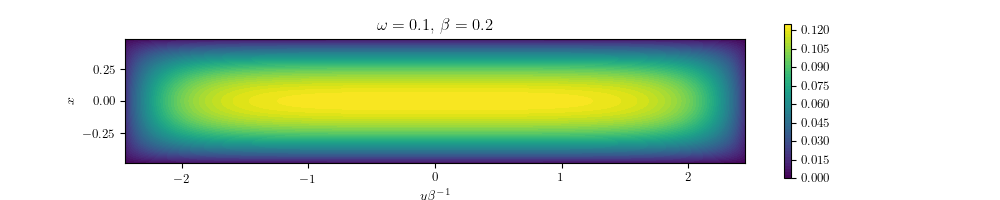

In [178]:
%matplotlib notebook

plt.figure(figsize=(10,2))

plt.xlabel(r'$y\beta^{-1}$')
plt.ylabel(r'$x$')
plt.title(fr'$\omega={W},\, \beta={Beta}$ ')
##
plt.contourf(X/Beta, Y, np.abs(U), 50, cmap='viridis')
plt.colorbar()
#plt.xlim(-np.sqrt(Xi_0**2+1)*1.1, np.sqrt(Xi_0**2+1)*1.1)
plt.axis('scaled')


#plt.ylim(-Xi_0*2, Xi_0*2)

file_name = f'Abs W={W}_Beta={Beta}'
#plt.savefig(file_name +'.pgf')
plt.savefig(file_name +'.pdf')



<IPython.core.display.Javascript object>


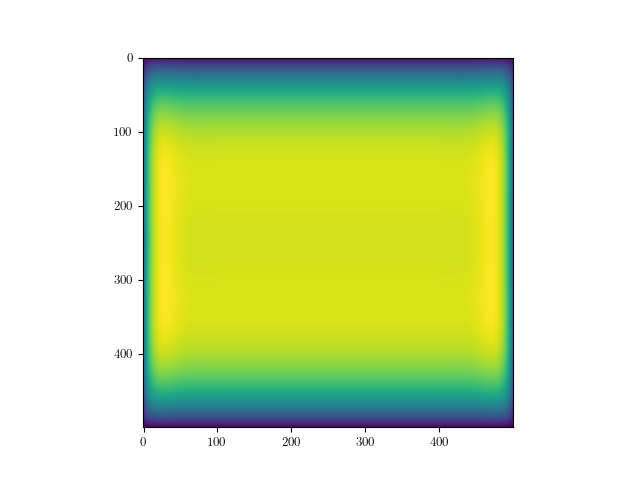

In [162]:
plt.imshow(np.abs(U/u_lam(0,0)))

<IPython.core.display.Javascript object>


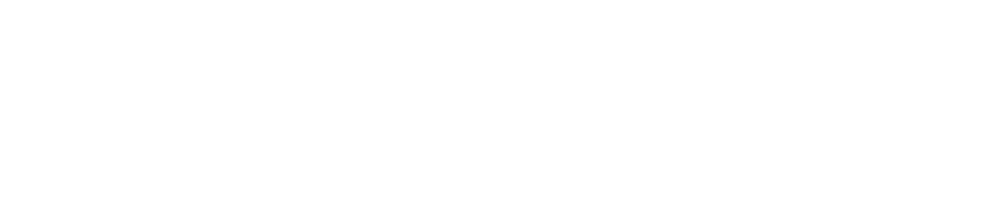

In [158]:
%matplotlib notebook

plt.figure(figsize=(10,2.1))

plt.xlabel(r'$y\beta^{-1}$')
plt.ylabel(r'$x$')
plt.title(fr'$\omega={W},\, \beta={Beta}$ ')
##
plt.contourf(X/Beta, Y, np.angle(U/u_lam(0,0), deg=True), 100, cmap='coolwarm')
plt.colorbar()
#plt.xlim(-np.sqrt(Xi_0**2+1)*1.1, np.sqrt(Xi_0**2+1)*1.1)
plt.axis('scaled')


#plt.ylim(-Xi_0*2, Xi_0*2)

file_name = f'Phase W={W}_Beta={Beta}'
plt.savefig(file_name +'.pdf')
#plt.savefig(file_name +'.pgf')



## Clear my solution

In [ ]:
def get_F_K_max(K_max):
    F = f_p
    for k in range(K_max):
        F += get_f_k(k)
    return F

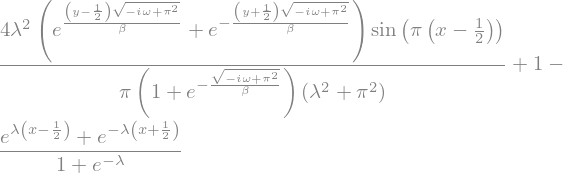

In [16]:
get_F_K_max(1)

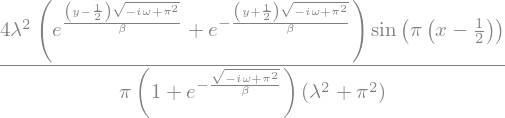

In [17]:
get_f_k(0)

<IPython.core.display.Javascript object>


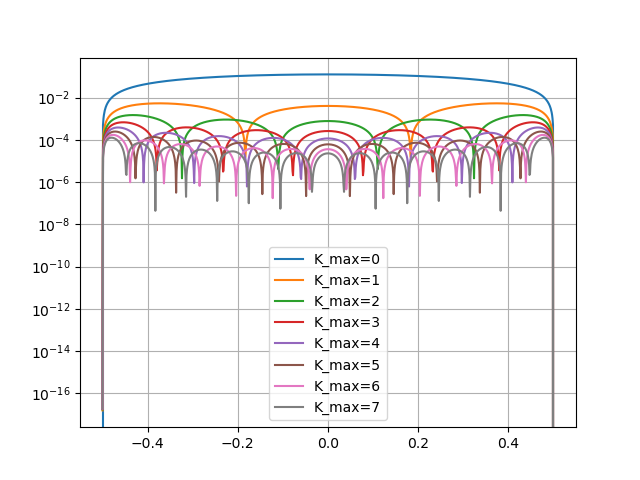

In [35]:
%matplotlib notebook
plt.figure()
for K_max in range(8):
    F = get_F_K_max(K_max)
    X = np.linspace(-1/2,1/2,1000)
    F_lam = lambdify(x, F.subs(y,Rational(1,2)).subs(l,sqrt(-I*w)).subs(w,1))
    plt.plot(X, np.abs(F_lam(X)), label=f'K_max={K_max}')
plt.legend()
plt.yscale('log')
plt.grid()

# Make Christopher J. Morris, Fred K. Forster solution

In [70]:
def get_F_th_N_max(N_max):
    F = 1
    for n in range(N_max):
        F -= 2*get_f_n(n)
    return F

In [184]:
def get_f_n(n):
    p_n = pi/2*(2*n+1)
    r_n = sqrt(-I*w/4+p_n**2)
    s_n = sqrt(-I*w/4/b**2+p_n**2)
    
    f_1= cos(p_n*2*y)
    f_1*= exp(r_n*(2*x-1)) + exp(-r_n*(2*x+1))
    f_1/= 1 + exp(-2*r_n)
    #f_1 *= cosh(r_n*2*x)/cosh(r_n)
    
    f_2= cos(p_n*2*x)
    f_2*= exp(s_n*(2*y-1)) + exp(-s_n*(2*y+1))
    f_2/= 1 + exp(-2*s_n)
    #f_2*= cosh(s_n*2*y)/cosh(s_n)
    f = f_1 + f_2
    f/= p_n
    f*= (-1)**n
    return f

<IPython.core.display.Javascript object>


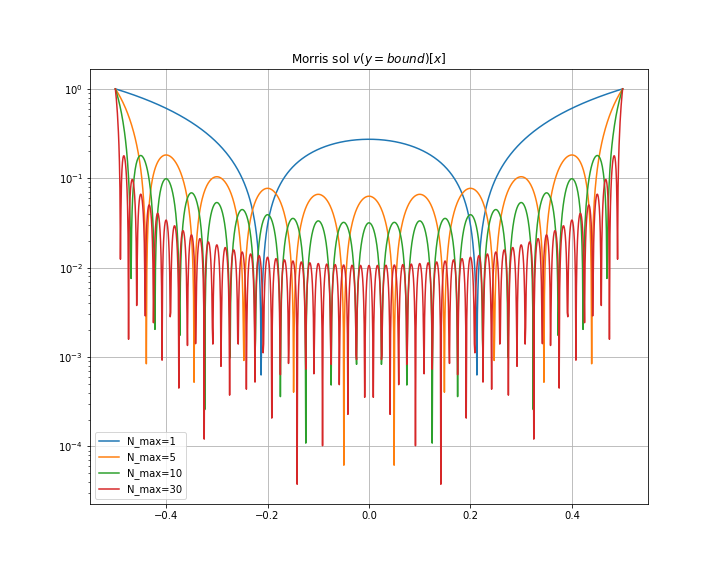

In [196]:
%matplotlib notebook
plt.figure(figsize=(10,8))
X = np.linspace(-1/2,1/2,1000)
for N_max in [1,5,10,30]:
    F = get_F_th_N_max(N_max)
    F_lam = lambdify(x, F.subs(y,Rational(1,2)).subs(w,1))
    plt.plot(X, np.abs(F_lam(X)), label=f'N_max={N_max}')
plt.legend()
plt.title(r'Morris sol $v(y=bound)[x]$')
plt.yscale('log')
plt.grid()

# Make drake solution

In [202]:
def get_F_th_N_max(N_max):
    F = 0
    for n in range(N_max):
        F -= 2*get_f_n(n)
    return F

In [216]:
def get_f_n(n):
    p_n = sqrt(-I*w/4 + Rational((2*n+1)**2,4)*pi**2)
    
    #f= exp(p_n/b*(2*y-1)) + exp(-p_n/b*(2*y+1))
    #f/= 1 + exp(-p_n/b*(2))
    #f = 1-f
    f = 1 - cosh(p_n*2*y/b)/cosh(p_n/b)
    f*= cos(pi/2*(2*n+1)*2*x)
    f/= p_n**2
    f*= (-1)**n
    f/= 2*n+1
    return f

In [209]:
N_max=1
F = get_F_th_N_max(N_max)
F.subs(y,Rational(1,2)).subs(w,1)

<IPython.core.display.Javascript object>


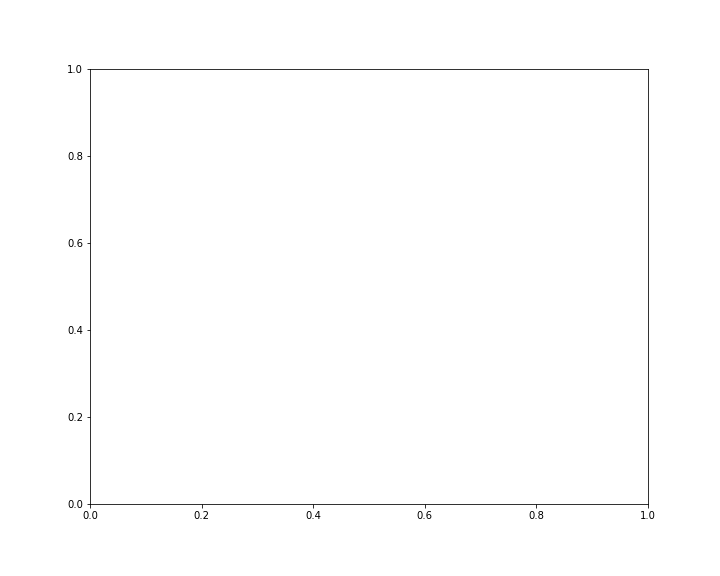

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

In [206]:
%matplotlib notebook
plt.figure(figsize=(10,8))
X = np.linspace(-1/2,1/2,1000)
for N_max in [1,5,10,30]:
    F = get_F_th_N_max(N_max)
    F_lam = lambdify(x, F.subs(y,Rational(1,2)).subs(w,1))
    plt.plot(X, np.abs(F_lam(X)), label=f'N_max={N_max}')
plt.legend()
plt.title(r'Drake sol $v(y=bound)[x]$')
plt.yscale('log')
plt.grid()

<IPython.core.display.Javascript object>


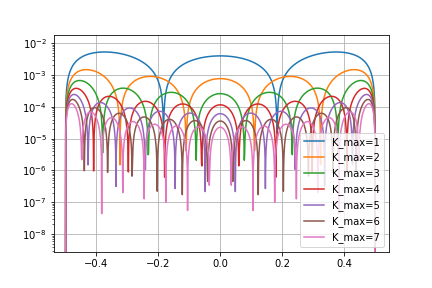

In [150]:
%matplotlib notebook
plt.figure()
X = np.linspace(-1/2,1/2,1000)
for K_max in range(1,8):
    F = get_F_K_max(K_max)
    F_lam = lambdify(x, F.subs(y,Rational(1,2)).subs(l,sqrt(-I*w)).subs(w,1))
    plt.plot(X, np.abs(F_lam(X)), label=f'K_max={K_max}')
plt.legend()
plt.yscale('log')
plt.grid()

In [148]:
F = get_F_th_N_max(2)

In [144]:
F_lam = lambdify(x, F.subs(y,Rational(1,2)).subs(w,1))

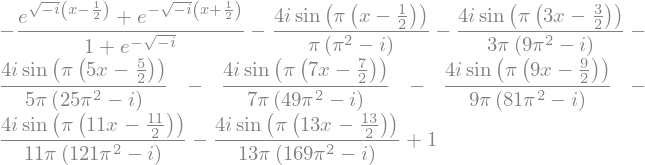

In [145]:
F.subs(y,Rational(1,2)).subs(l,sqrt(-I*w)).subs(w,1)

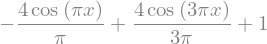

In [149]:
F.subs(y,Rational(1,2)).subs(w,1)

In [214]:
X = np.linspace(-1/2+1e-2,1/2-1e-2, 500)
Y = np.linspace(-1/2+1e-2,1/2-1e-2, 500)

X,Y = np.meshgrid(X,Y)

In [215]:
%matplotlib inline
@interact_manual(K_max=(1, 100, 1), N_max=(1, 100, 1), power_w = (-4,4,0.5), beta=(0,5,0.1))
def plot_filed(K_max, N_max, power_w, beta):
    W=10**power_w
    
    u = get_F_K_max(K_max)
    #u = get_f_k(0)
    u = u.subs(l, sqrt(-I*w))

    u_new = u.subs({w:W, b:beta})
    u_lam = lambdify([x,y], u_new)
    U = u_lam(X,Y)
    
    plt.figure()

    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title(fr'$\omega={W},\, \beta={beta}$ ')
    plt.contourf(X, Y, np.abs(U), 50, cmap='viridis')
    plt.colorbar()
    file_name = f'Abs W={W}_Beta={beta}'
    plt.savefig(file_name +'.pdf')
    plt.axis('scaled')
    
    u = get_F_th_N_max(N_max)
    #u = get_f_k(0)
    u = u.subs(l, sqrt(-I*w))

    u_new = u.subs({w:W, b:beta})
    u_lam = lambdify([x,y], u_new)
    U_th = u_lam(X,Y)
    
    plt.figure()

    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title(fr'$\omega={W},\, \beta={beta}$ ')
    res = np.abs(U_th/U)
    res[np.abs(X*Y)>1/4-1/30] = np.nan
    plt.contourf(X, Y, np.abs(U_th), 50, cmap='viridis')
    plt.colorbar()
    plt.axis('scaled')
    file_name = f'Abs there W={W}_Beta={beta}'
    plt.savefig(file_name +'.pdf')

interactive(children=(IntSlider(value=50, description='K_max', min=1), IntSlider(value=50, description='N_max'…

<IPython.core.display.Javascript object>


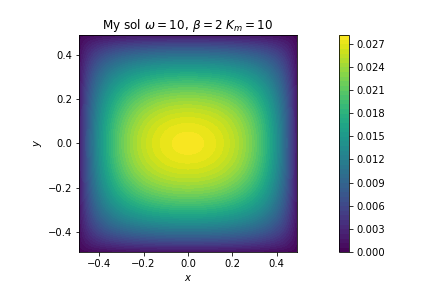

<IPython.core.display.Javascript object>


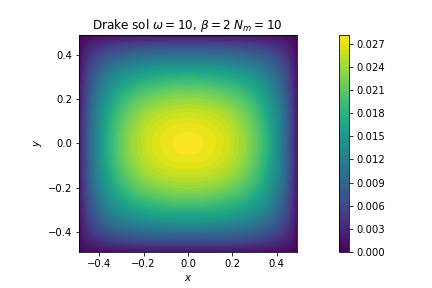

In [233]:
K_max, N_max, power_w, beta = (10,10,1,2)
W=10**power_w

u = get_F_K_max(K_max)
#u = get_f_k(0)
u = u.subs(l, sqrt(-I*w))/(I*w)

u_new = u.subs({w:W, b:beta})
u_lam = lambdify([x,y], u_new)
U = u_lam(X,Y)

plt.figure()

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(fr'My sol $\omega={W},\, \beta={beta}\; K_m = {K_max}$ ')
plt.contourf(X, Y, np.abs(U), 50, cmap='viridis')
plt.colorbar()
file_name = f'Abs W={W}_Beta={beta}'
plt.savefig(file_name +'.pdf')
plt.axis('scaled')

u = get_F_th_N_max(N_max)
#u = get_f_k(0)
u = u.subs(l, sqrt(-I*w))/pi/2

u_new = u.subs({w:W, b:beta})
u_lam = lambdify([x,y], u_new)
U_th = u_lam(X,Y)

plt.figure()

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(fr'Drake sol $\omega={W},\, \beta={beta} \;N_m={N_max}$ ')
res = np.abs(U_th/U)
res[np.abs(X*Y)>1/4-1/30] = np.nan
plt.contourf(X, Y, np.abs(U_th), 50, cmap='viridis')
plt.colorbar()
plt.axis('scaled')
file_name = f'Abs there W={W}_Beta={beta}'
plt.savefig(file_name +'.pdf')

<IPython.core.display.Javascript object>


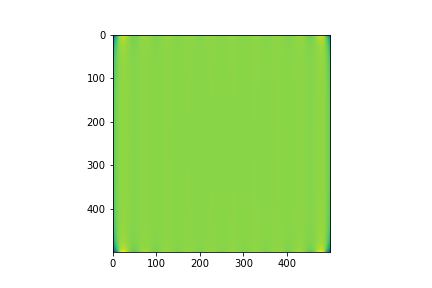

In [232]:
%matplotlib notebook
res = np.abs(U_th/U)
#res[np.abs(X*Y)>1/4-1/10] = np.nan
plt.imshow(res)

In [119]:
F_my = get_F_K_max(3).subs(l, sqrt(-I*w))/(I*w)

In [130]:
F_th = get_F_th_N_max(1)

In [121]:
simplify((I*w*F_my + diff(F_my,x,x) + b**2 * diff(F_my,y,y)))

In [132]:
simplify((I*w*F_th + diff(F_th,x,x) + b**2 * diff(F_th,y,y)))

KeyboardInterrupt: 

In [105]:
F_my*I*w - diff(F_my,x,x)

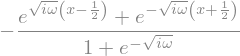

In [99]:
diff(F_my,x,x)

In [107]:
f_t = cosh(l*x)/cosh(l/2)

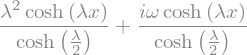

In [108]:
I*w*f_t + diff(f_t, x,x)

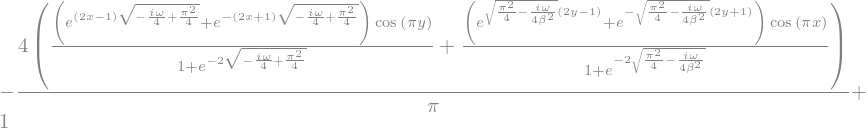

In [131]:
simplify(F_th)